In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import graphviz
from IPython.display import Image
import os
import pickle

In [2]:
os.chdir("C:\\Users\\TBRC-lap35\\Desktop\\Assignments\\Decision_Tree")

In [3]:
#Importing the data
data = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv",sep = ",")

data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#Checking Null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#filling null values
data["Age"] = data["Age"].fillna(data['Age'].mean())
data["Cabin"] = data["Cabin"].fillna(data['Cabin'].mode()[0])
data["Embarked"] = data["Embarked"].fillna(data['Embarked'].mode()[0])

In [6]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  B96 B98        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  B96 B98        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  B96 B98        S

In [7]:
#No of male and female Survived

data.groupby('Sex')["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

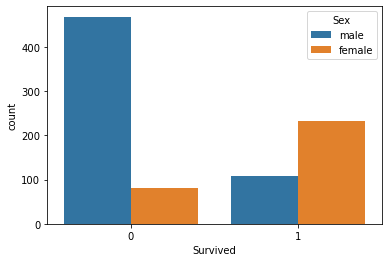

In [8]:
sns.countplot(x = 'Survived',data = data,hue = 'Sex')

In [9]:
#No of male and female Survived in each class

data.groupby(['Sex','Pclass'])['Survived'].sum()

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

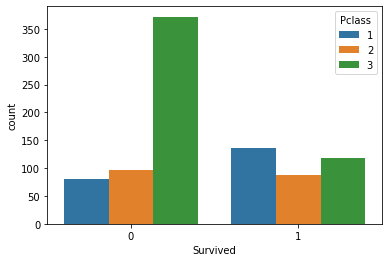

In [10]:
sns.countplot(x = 'Survived',data = data,hue = 'Pclass')

In [11]:
data.groupby('Age')['Fare'].mean()

Age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 89, dtype: float64

In [12]:
#Average Pricing of a ticket for male and female
data.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

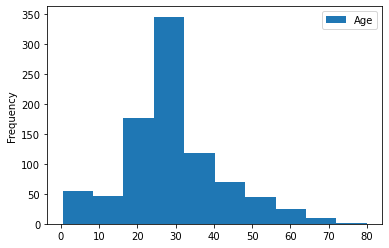

In [13]:
data.plot(y='Age',kind = 'hist')

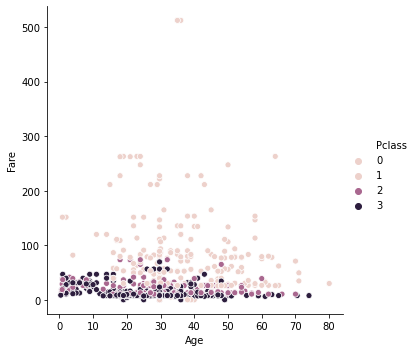

In [14]:
sns.relplot(x= 'Age',y='Fare',data=data,hue='Pclass')

In [15]:
#Preparing data for model building
data = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
data.head()

Pclass     Sex   Age  SibSp  Parch     Fare  Survived
0       3    male  22.0      1      0   7.2500         0
1       1  female  38.0      1      0  71.2833         1
2       3  female  26.0      0      0   7.9250         1
3       1  female  35.0      1      0  53.1000         1
4       3    male  35.0      0      0   8.0500         0

In [16]:
data.describe()

Pclass         Age       SibSp       Parch        Fare    Survived
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208    0.383838
std      0.836071   13.002015    1.102743    0.806057   49.693429    0.486592
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.910400    0.000000
50%      3.000000   29.699118    0.000000    0.000000   14.454200    0.000000
75%      3.000000   35.000000    1.000000    0.000000   31.000000    1.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200    1.000000

In [17]:
data = pd.get_dummies(data,prefix=['Sex'])


In [18]:
data["Pclass"] = data["Pclass"].astype('category')
data = pd.get_dummies(data,prefix=['Pclass'])

In [19]:
data.head()

Age  SibSp  Parch     Fare  Survived  Sex_female  Sex_male  Pclass_1  \
0  22.0      1      0   7.2500         0           0         1         0   
1  38.0      1      0  71.2833         1           1         0         1   
2  26.0      0      0   7.9250         1           1         0         0   
3  35.0      1      0  53.1000         1           1         0         1   
4  35.0      0      0   8.0500         0           0         1         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1

In [20]:
#dropping Sex_female and Pclass_3 to aviod dummy variable trap
data.drop(columns = ['Sex_female','Pclass_3'],inplace = True)

In [21]:
data.head()

Age  SibSp  Parch     Fare  Survived  Sex_male  Pclass_1  Pclass_2
0  22.0      1      0   7.2500         0         1         0         0
1  38.0      1      0  71.2833         1         0         1         0
2  26.0      0      0   7.9250         1         0         0         0
3  35.0      1      0  53.1000         1         0         1         0
4  35.0      0      0   8.0500         0         1         0         0

In [22]:
#dividing the data into input and target variables
x = data.drop(columns = ['Survived'])
y = data['Survived']

In [23]:
#Scaling the data using StandardScaler method
scaler = StandardScaler()
x_new = scaler.fit_transform(x)

In [24]:
#Developing the model
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.25,random_state=355)

In [25]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
clf.score(x_train,y_train)

0.9865269461077845

In [27]:
#Predicting the values for test data
py_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.7174887892376681

In [28]:
#Confusion matrix for test data
conf_mat_test = confusion_matrix(y_test,py_pred)
conf_mat_test

array([[105,  40],
       [ 23,  55]], dtype=int64)

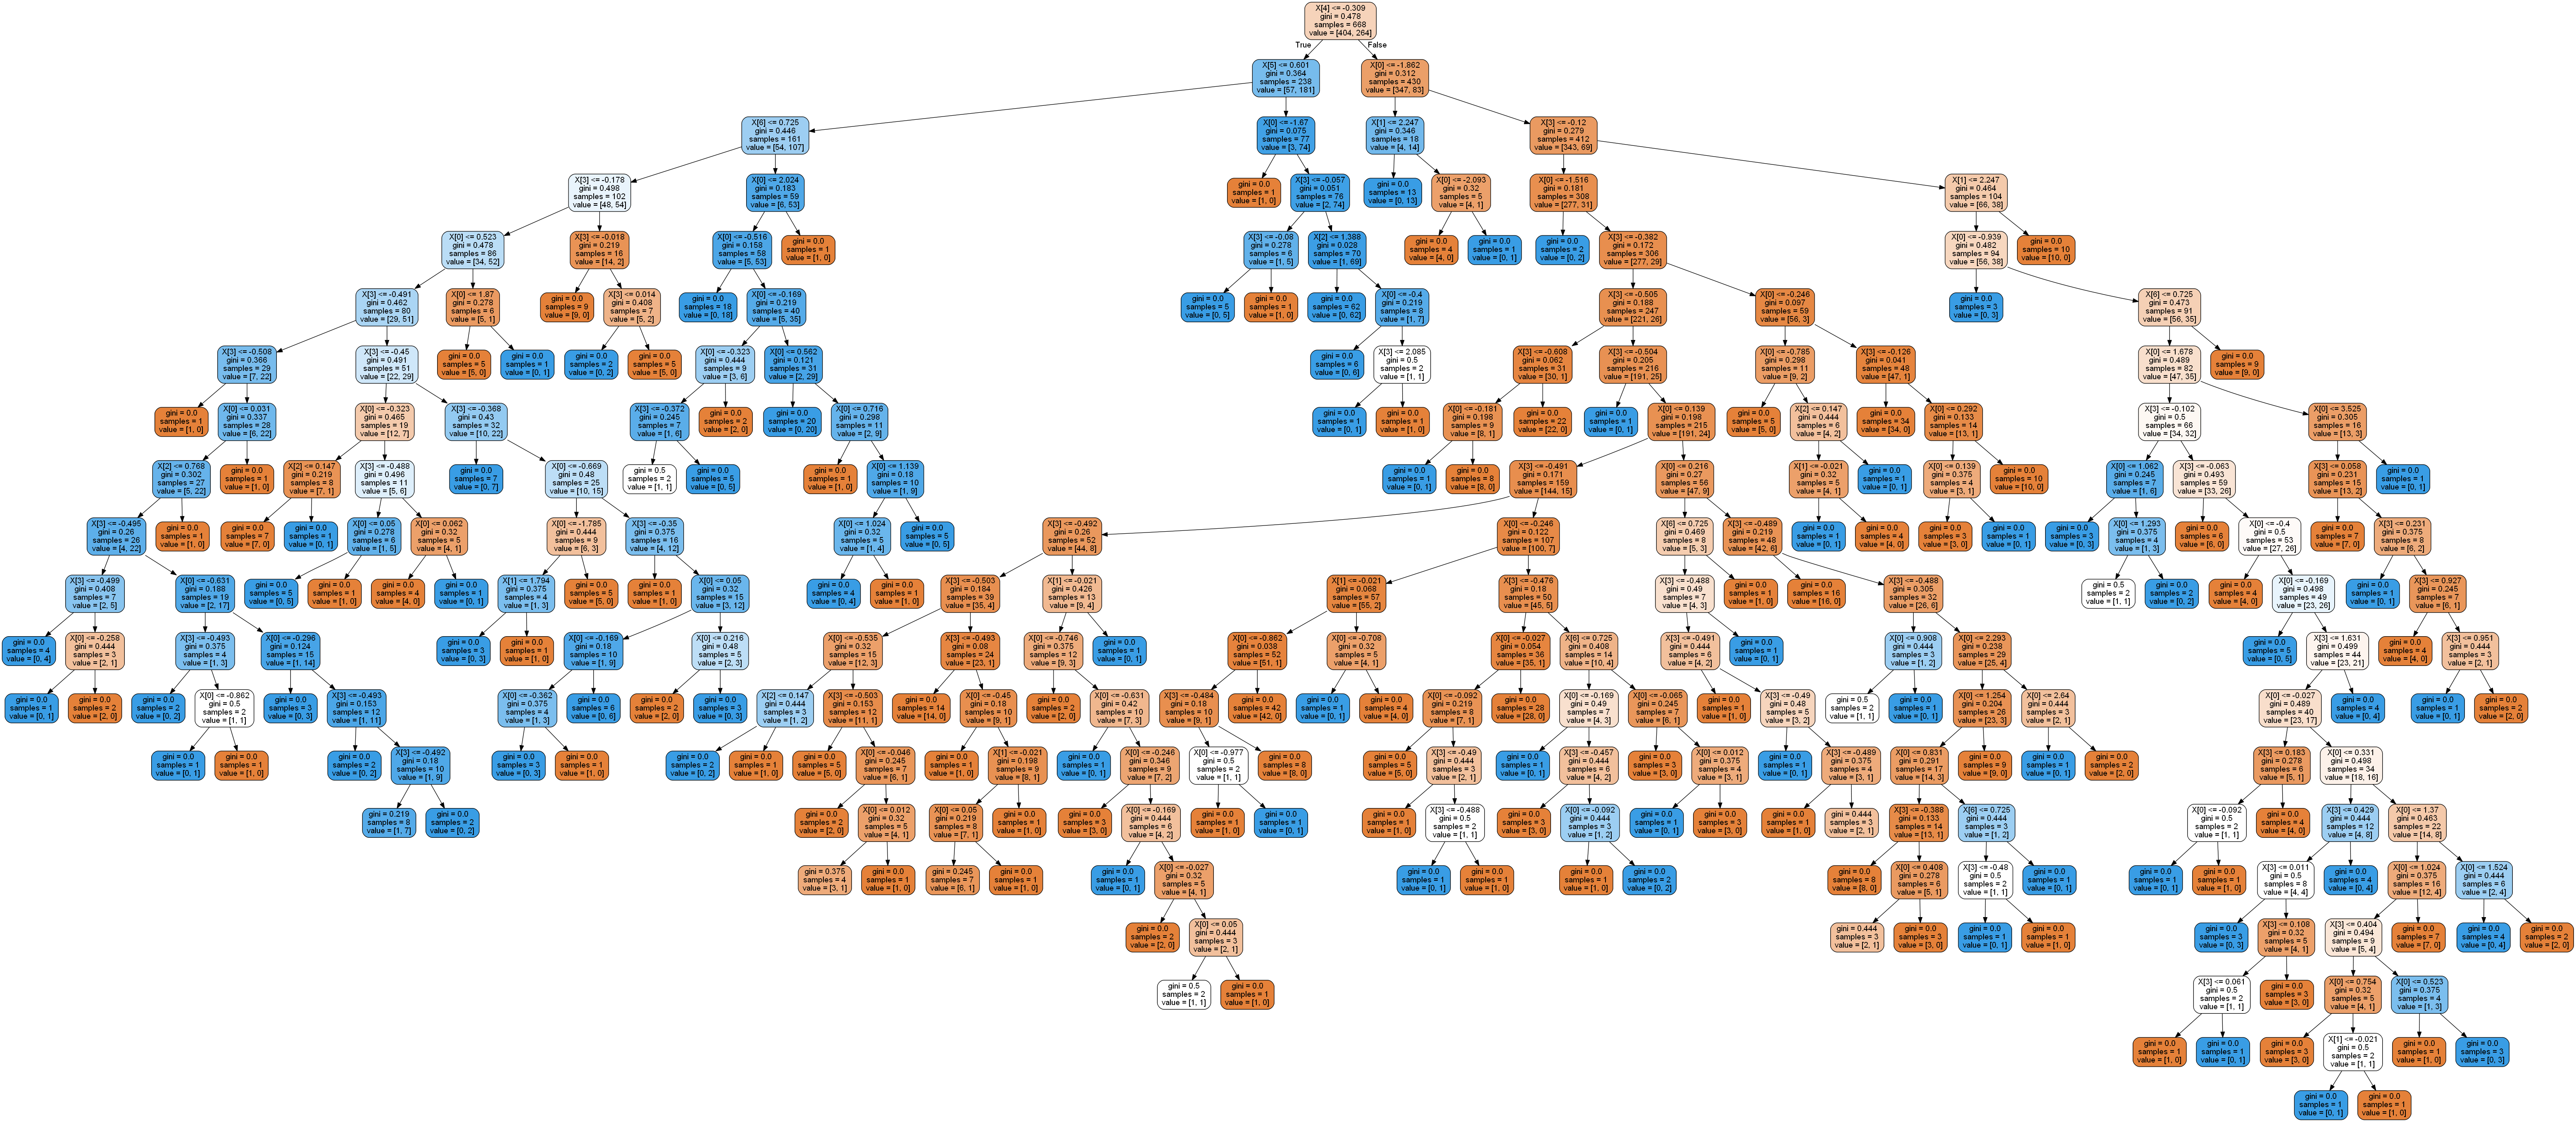

In [29]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [30]:
#Tunning Hyperparameters using gridsearch CV
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [31]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [33]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'random'}


In [34]:
grid_search.best_score_

0.8293008641005499

In [35]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =23, min_samples_leaf= 2, min_samples_split= 3, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=3, splitter='random')

In [36]:
clf.score(x_test,y_test)

0.7488789237668162

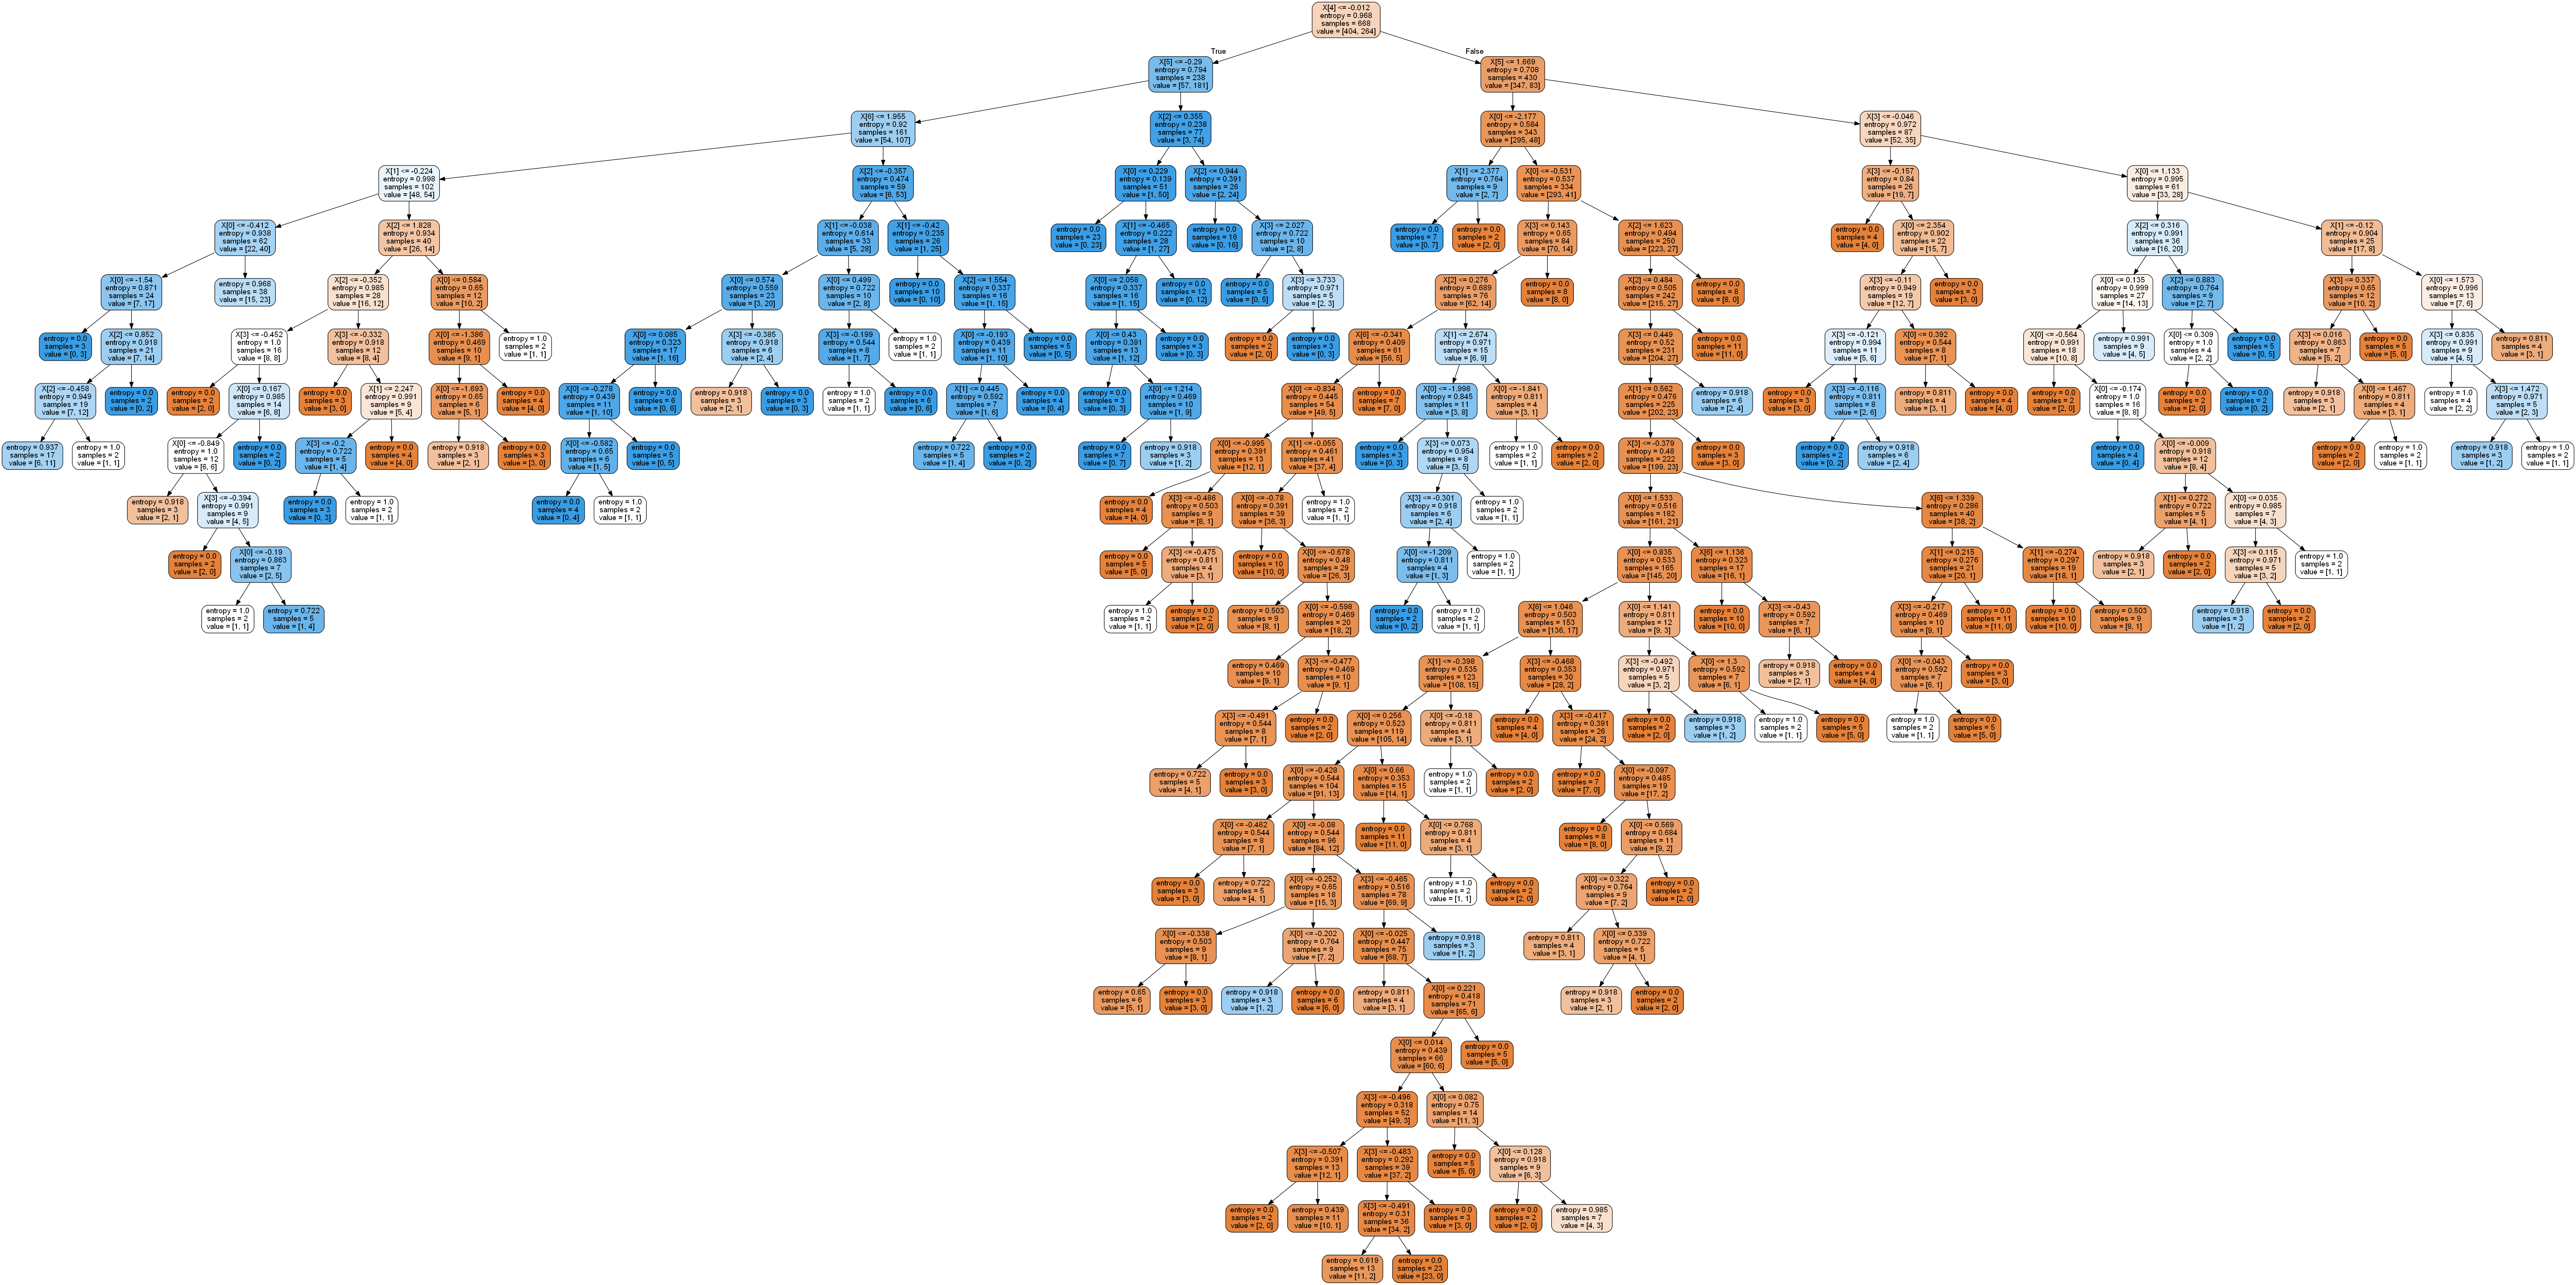

In [37]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [38]:
# Writing different model files to file
filename = "finilized_model.pickle"
pickle.dump(clf,open(filename,'wb'))